
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 1 - Modelagem do Preço </center></h1>

A presente atividade prática abordará a modelagem estocástica do preço, somado a conceituação de volatilidade, expectativa de retorno o índice Sharpe entre outros aspectos fundamentais e quantitativos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Brownian motion">Modelo com Movimento Browniano</a></li>
        <li><a href="#Geometric Brownian motion">Modelo com Movimento Browniano Geometrico</a></li>
        <li><a href="#Log-return">Retorno de um Ativo Financeiro</a></li>
        <li><a href="#Expected return and volatility "> Expectativa de Retorno e Volatilidade </a></li>
        <li><a href="#Risco Retorno">Diagrama Risco Retorno</a></li>
        <li><a href="#Indice Sharpe">Índice Sharpe</a></li>
        <li><a href="#Correlação">Índice de Correlação</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

<div id="Brownian motion">
    <h2>1) Modelo de Preço com Movimento Browniano</h2>
</div>

<b>Bachelier</b> in 1900 descreveu o movimento do preço como <br>

<ul>
$ \large
\begin{equation}
 p(t)=p(0)+\mu t + \sigma w(t)\\ 
 \end{equation}
$
</ul>

Text(0.5, 1.0, 'Preço Modelado com Movimento Browniano')

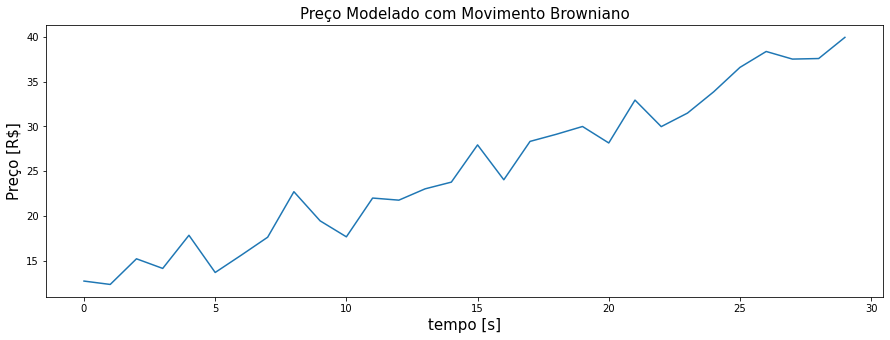

In [2]:
po=12
mu=.9
sigma=1.9
w = np.random.normal(0,1, 30)
t=np.arange(0,30)

p1=po+mu*t+sigma*w

fig = plt.subplots(figsize=(15, 5))
plt.plot(p1)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com Movimento Browniano',fontsize=15)


<div id="Geometric Brownian motion">
    <h2>2) Modelo de Preço com Movimento Browniano Geometrico</h2>
</div>

Uma melhor modelagem corresponde ao <b>Movimento Geometrico Browniano</b> definido por 
<ul>
$ \large
\begin{equation} 
 \frac{dp(t)}{p(t)}  = \mu dp(t) + \sigma dw(t) \\
 p(t)  =p(0)exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>

Text(0.5, 1.0, 'Preço Modelado com movimento browniano Geometrico')

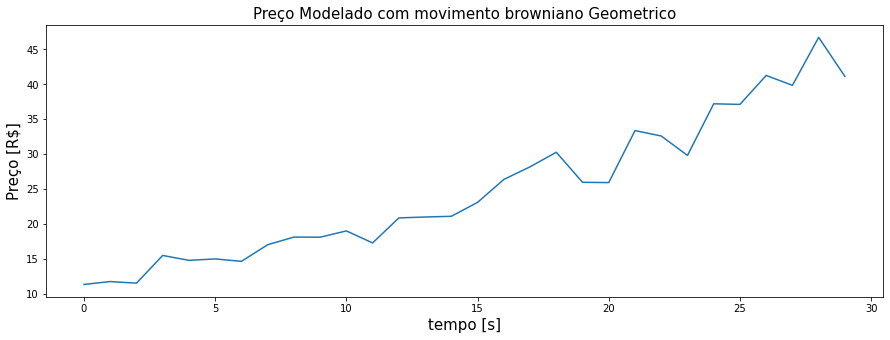

In [3]:
po=12
mu=.05
sigma=.09
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(15, 5))
plt.plot(p2)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com movimento browniano Geometrico',fontsize=15)

In [4]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2
df.describe()

,p1,p2
count,30.000000,30.000000
mean,25.172843,24.853746
std,8.504853,10.106684
min,12.323363,11.315877
25%,17.691966,17.071956
50%,23.898461,22.081936
75%,31.112867,32.011825
max,39.958138,46.732437


Text(0.5, 1.0, 'Preços Modelados com Movimento Browniano Geometrico')

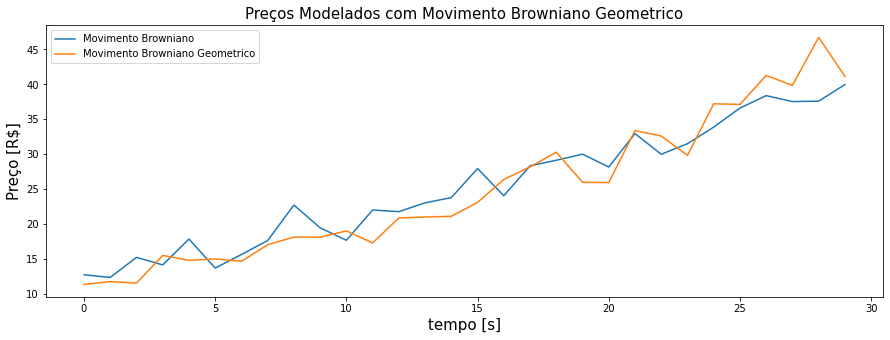

In [5]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

fig = plt.subplots(figsize=(15, 5))
plt.plot(df['p1'],label='Movimento Browniano')
plt.plot(df['p2'],label='Movimento Browniano Geometrico')

plt.legend(loc='upper left')
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preços Modelados com Movimento Browniano Geometrico',fontsize=15)


<div id="Log-return">
    <h2>3) Retorno de um Ativo Financeiro</h2>
</div>

O <b>retorno</b> de um ativo em tempo discreto pode ser definindo pelas seguintes equações

<ul>
$ \large
\begin{equation}
 r(n)=\frac{p(n)-p(n-1)}{p(n-1)} \\ 
 r(n)=\frac{p(n)}{p(n-1)}-1 \\
 r(n)=ln[p(n)]-ln[p(n-1)]=ln[\frac{p(n)}{p(n-1)}]\cong\frac{p(n)}{p(n-1)}-1 
\end{equation}
$
</ul>

Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

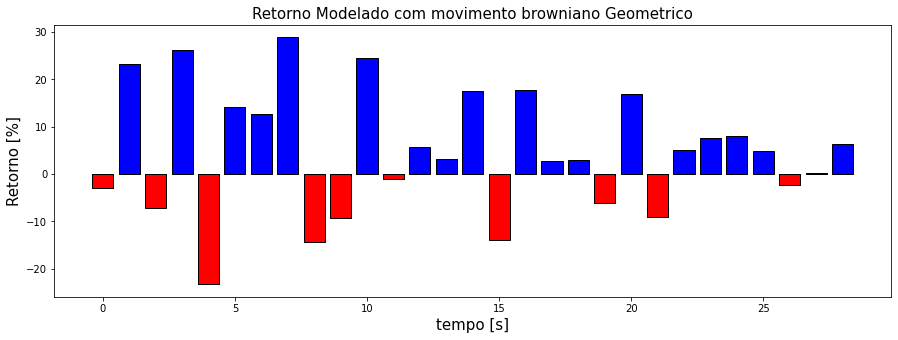

In [6]:
r1=np.log(p1[1:])-np.log(p1[0:-1])

fig = plt.subplots(figsize=(15, 5))

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m>=0)]=0
plt.bar(range(len(r1)),100*r1m,color='red',edgecolor='black')

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m<0)]=0
plt.bar(range(len(r1)),100*r1m,color='blue',edgecolor='black')


plt.ylabel('Retorno [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)


In [7]:
r1

array([-0.03015229,  0.20928813, -0.0735255 ,  0.23316987, -0.26583549,
        0.13333735,  0.12030124,  0.25393453, -0.15511887, -0.09638912,
        0.21972024, -0.01075185,  0.05651988,  0.03210427,  0.16140716,
       -0.15031297,  0.16429132,  0.02768504,  0.02948323, -0.06337837,
        0.1572738 , -0.09434026,  0.04923777,  0.07294234,  0.07747046,
        0.04747643, -0.02242737,  0.0016723 ,  0.06109987])

Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

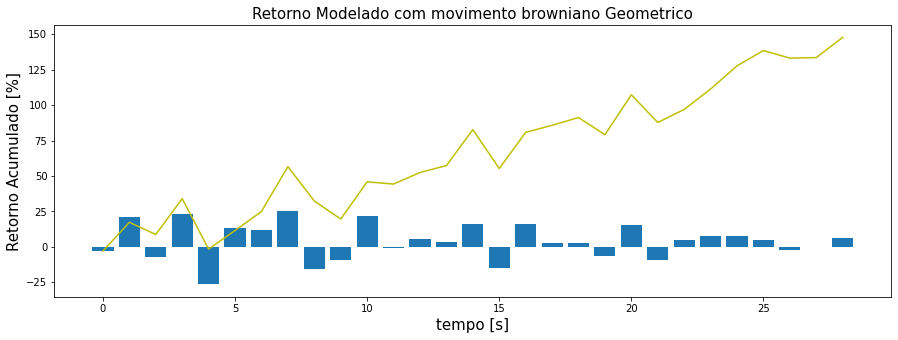

In [8]:
def sumper(per):
    persum=np.cumprod(1 + per) - 1
    return 100*persum

fig = plt.subplots(figsize=(15, 5))

plt.plot(sumper(r1),"y")
plt.bar(range(len(r1)),100*r1)
plt.ylabel('Retorno Acumulado [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)

Text(0.5, 1.0, 'Retornos Modelados com Movimento Browniano Geometrico')

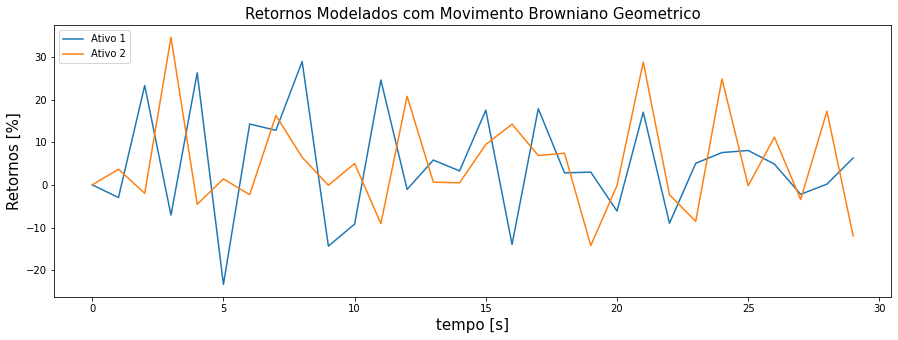

In [9]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)
#fig = plt.subplots()
#df[['r1','r2']].plot()
#df

fig = plt.subplots(figsize=(15, 5))
plt.plot(100*df['r1'],label='Ativo 1')  
plt.plot(100*df['r2'],label='Ativo 2') 
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retornos Modelados com Movimento Browniano Geometrico',fontsize=15)

In [10]:
print("Inicio do Data Frame:")
print(df.head())
print("")
print("Fim do Data Frame:")
print(df.tail())
print("")
print("Algumas Informações:")
print(df.describe())

Inicio do Data Frame:
          p1         p2        r1        r2
0  12.700600  11.315877  0.000000  0.000000
1  12.323363  11.730899 -0.029702  0.036676
2  15.192244  11.498031  0.232800 -0.019851
3  14.115303  15.473106 -0.070888  0.345718
4  17.821925  14.768458  0.262596 -0.045540

Fim do Data Frame:
           p1         p2        r1        r2
25  36.598641  37.124045  0.080550 -0.002272
26  38.378122  41.270716  0.048621  0.111698
27  37.526981  39.852751 -0.022178 -0.034358
28  37.589790  46.732437  0.001674  0.172628
29  39.958138  41.131409  0.063005 -0.119853

Algumas Informações:
              p1         p2         r1         r2
count  30.000000  30.000000  30.000000  30.000000
mean   25.172843  24.853746   0.046667   0.050094
std     8.504853  10.106684   0.128480   0.117881
min    12.323363  11.315877  -0.233435  -0.142331
25%    17.691966  17.071956  -0.027821  -0.022245
50%    23.898461  22.081936   0.040623   0.010083
75%    31.112867  32.011825   0.138936   0.107448
ma

<div id="Expected return and volatility">
    <h2>4) Expectativa de Retorno e Volatilidade</h2>
</div>


A <b>Média</b> and <b>Desvio Padrão</b> do retorno de um ativo, $\mu$ and $\sigma$, são definidos com a <b>expectativa de retorno</b> e a  <b>volatilidade</b> de um ativo
<ul>
$ \large
\begin{equation} 
\mu=E\{ r(n) \}=E\{\frac{p(n)-p(n-1)}{p(n-1)}\} \\
\sigma=E\{r(n)-\mu\}=(E\{r(n)^2\}-\mu^2 )^{\frac{1}{2}} \\
\end{equation}
$
</ul>

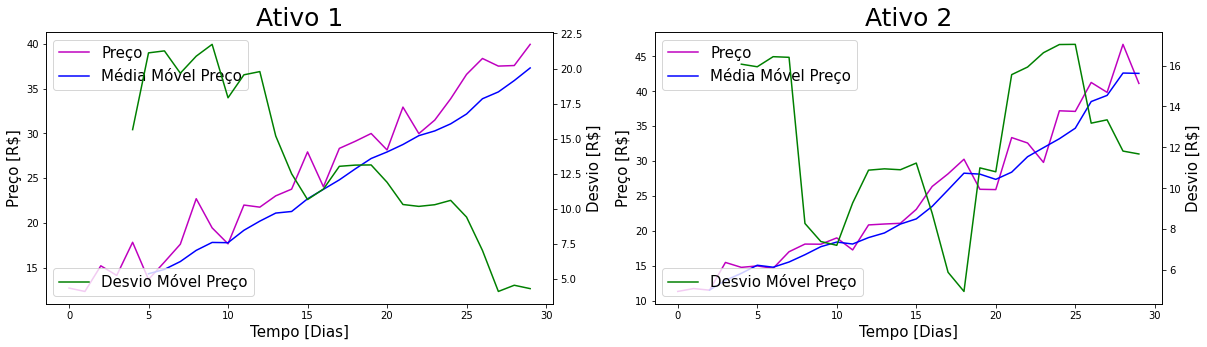

In [11]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=100*np.concatenate(([0], r1), axis=0)

r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=100*np.concatenate(([0], r2), axis=0)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,2, 1) 
ax1.plot(df['p1'], color='m',label='Preço')  
ax1.plot(df['p1'].rolling(window=6).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r1'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 1',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)

ax1=plt.subplot(1,2, 2) 
ax1.plot(df['p2'], color='m',label='Preço')  
ax1.plot(df['p2'].rolling(window=3).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r2'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 2',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)


<div id="Risco Retorno">
    <h2>5) Diagrama Risco Retorno</h2>
</div>


Em um <b>diagrama retorno x risco </b> para um dado retorno previsto o risco também é estimado

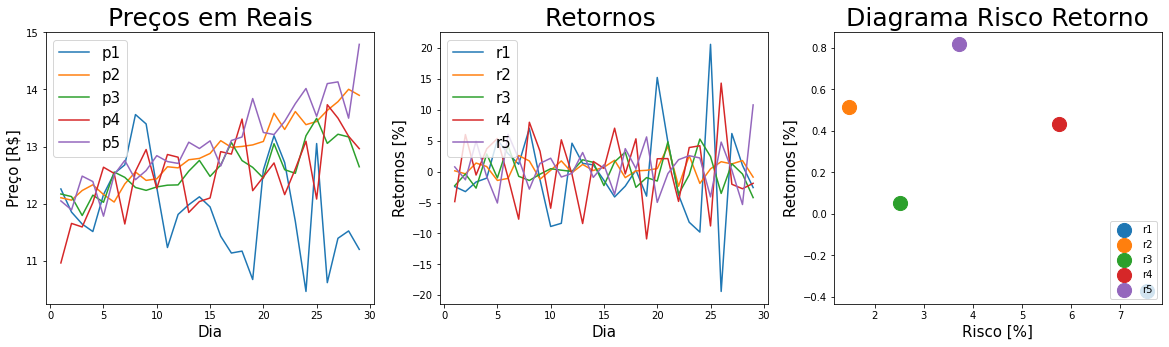

In [12]:
def MBG(po,mu,sigma,t):
    w = np.random.normal(0,1, t)
    t=np.arange(0,t)
    return po*np.exp((mu-(sigma**2)/2)*t+sigma*w)


po    =    [12,   12,   12,   12, 12]
mu    =    [.003, 0.005, 0.0033, 0.0041, 0.006]
sigma =    [0.08,  0.01,  0.02, 0.05, 0.022]
t     =    30

df=None

for i in range(len(po)):
    
    if df is None:
        df=pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))
    else:
        df=pd.concat([df,pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))],axis=1)

df.columns=list(['p'+str(x) for x in range(1,len(po)+1)])
ret=100*df[df.columns[:5]].diff()/df[df.columns[:5]].iloc[0]

ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])
df=pd.concat([df, ret], axis=1)
df=df.dropna()

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,3, 1) 
df[df.columns[:5]].plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax1=plt.subplot(1,3, 2) 
df[df.columns[5:]].plot(ax=ax1)
ax1.set_title('Retornos ',fontsize=25)
ax1.set_ylabel('Retornos [%]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax3=plt.subplot(1,3, 3) 
x = df[df.columns[5:]].std().values
y = df[df.columns[5:]].mean().values


#colors = ['b', 'darkorange', 'green', 'r', 'purple']
for i in range(len(x)):
    ax3.scatter(x[i],y[i],  s=200, label='r'+str(1+i))

    
    
    
plt.legend(loc='lower right')


plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('Risco [%]',fontsize=15)

plt.title('Diagrama Risco Retorno',fontsize=25)
plt.show()


<div id="Indice Sharpe">
    <h2>6) Indice Sharpe</h2>
</div>



O <b>Índice de Sharpe</b> foi criado por William Sharpe (Nobel de Economia em 1990) e permite avaliar a relação entre o retorno e o risco de um investimento. Ele mede qual é a relação entre o retorno excedente ao ativo livre de risco e a volatilidade.
O <b>Índice Sharpe</b> é definido por
<ul>


$ \Large
\begin{equation} 
 SR=\frac{\mu-r_f}{\sigma}  
\end{equation}
$


</ul>

In [13]:
sharpe5=(df['r2'].mean()-2/(12))/df['r2'].std()
sharpe2=(df['r1'].mean()-2/(12))/df['r1'].std()
print("Indice Sharpe de r2 = %.2f e Indice Shape de r1 = %.2f" % (sharpe5, sharpe2))

Indice Sharpe de r2 = 0.24 e Indice Shape de r1 = -0.07


<div id="Correlação">
    <h2>7) Indice de Correlação</h2>
</div>



O <b>coeficiente de correlação </b> de Pearson ou "ρ de Pearson" identifica o grau da correlação entre duas variáveis &emsp;

<ul> 
$ \large
\begin{equation}  
 cov[r_1(n),r_2(n)]=E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu \\[10pt]
 \rho=\frac{E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu_{2}}{\sigma_{1} \sigma_{2}} \\
\end{equation}  
$
</ul>


In [14]:
cor1=(np.mean(df['r1']*df['r2'])-np.mean(df['r1'])*np.mean(df['r2']))/(np.std(df['r1'])*np.std(df['r2']))
cor2=df[['r1','r2']].corr()

print("Indice de correlação pela equação explícita (%.2f) e função implícita (%.2f)" % (cor1, cor2['r1'][1]))

Indice de correlação pela equação explícita (0.03) e função implícita (0.03)


In [15]:
df.corr()

,p1,p2,p3,p4,p5,r1,r2,r3,r4,r5
p1,1.000000,-0.306117,-0.215040,-0.367174,-0.426321,0.584666,0.098579,0.040772,-0.165970,-0.342893
p2,-0.306117,1.000000,0.780081,0.597986,0.880021,-0.033604,0.223665,-0.024400,0.005681,0.056167
p3,-0.215040,0.780081,1.000000,0.513503,0.694271,0.119739,0.098969,0.382718,-0.109355,-0.032891
p4,-0.367174,0.597986,0.513503,1.000000,0.517828,-0.186532,0.002726,0.062940,0.490755,0.001630
p5,-0.426321,0.880021,0.694271,0.517828,1.000000,-0.159706,0.039545,-0.082213,-0.144319,0.427725
r1,0.584666,-0.033604,0.119739,-0.186532,-0.159706,1.000000,0.033424,0.186474,-0.335081,-0.493293
r2,0.098579,0.223665,0.098969,0.002726,0.039545,0.033424,1.000000,0.074303,0.096882,-0.198299
r3,0.040772,-0.024400,0.382718,0.062940,-0.082213,0.186474,0.074303,1.000000,-0.064940,-0.166167
r4,-0.165970,0.005681,-0.109355,0.490755,-0.144319,-0.335081,0.096882,-0.064940,1.000000,-0.212799
r5,-0.342893,0.056167,-0.032891,0.001630,0.427725,-0.493293,-0.198299,-0.166167,-0.212799,1.000000


In [16]:
print('Matriz de Correlações')
print('')
print(df[df.columns[5:]].corr())

Matriz de Correlações

          r1        r2        r3        r4        r5
r1  1.000000  0.033424  0.186474 -0.335081 -0.493293
r2  0.033424  1.000000  0.074303  0.096882 -0.198299
r3  0.186474  0.074303  1.000000 -0.064940 -0.166167
r4 -0.335081  0.096882 -0.064940  1.000000 -0.212799
r5 -0.493293 -0.198299 -0.166167 -0.212799  1.000000


In [17]:
import investpy
import datetime as dt
from tqdm import tqdm

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
#symbols=[sy+".sa" for sy in symbols[:-1]]
len(symbols)

82

In [18]:
output = None
cols=[]
today=str(dt.date.today())
today=today[-2:]+"/"+today[-5:-3]+"/"+today[:4]
 
for symbol in tqdm(symbols):
    try: 
        df = investpy.get_stock_historical_data(stock=symbol,
                                                country='Brazil',
                                                from_date='01/01/2019',
                                                to_date=today)
        cols.append(symbol)

        if output is None:
            output = df.Close
        else:
            output = pd.concat([output, df.Close], axis = 1)
    except:
        print("Erro = "+symbol)
output.columns=cols

 73%|███████▎  | 60/82 [01:12<00:15,  1.46it/s]

Erro = NTCO3
Erro = PCAR3


 89%|████████▉ | 73/82 [01:27<00:08,  1.10it/s]

Erro = TIMS3


100%|██████████| 82/82 [01:37<00:00,  1.19s/it]

Erro = Quantidade Teórica Total  Redutor


In [19]:
len(output.columns)
corre=output.pct_change().corr()
corre

,ABEV3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,...,SUZB3,TAEE11,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
ABEV3,1.000000,0.506472,0.467053,0.510182,0.565136,0.564369,0.452598,0.262778,0.431335,0.275901,...,0.197945,0.407088,0.322805,0.530042,0.408243,0.285735,0.378768,0.353612,0.449534,0.452636
AZUL4,0.506472,1.000000,0.553786,0.658768,0.622239,0.627742,0.440357,0.288566,0.571782,0.389529,...,0.178237,0.446994,0.469076,0.586526,0.536410,0.421035,0.322982,0.564204,0.464728,0.529363
B3SA3,0.467053,0.553786,1.000000,0.682357,0.673556,0.642412,0.605474,0.309872,0.669550,0.431529,...,0.160442,0.521421,0.540635,0.619506,0.491667,0.456194,0.404821,0.561998,0.547204,0.474658
BBAS3,0.510182,0.658768,0.682357,1.000000,0.891063,0.888468,0.627417,0.268740,0.644632,0.490821,...,0.099484,0.504494,0.468767,0.673652,0.612601,0.525850,0.387398,0.571966,0.418413,0.522393
BBDC3,0.565136,0.622239,0.673556,0.891063,1.000000,0.965515,0.640239,0.260705,0.647347,0.473370,...,0.119859,0.486741,0.404569,0.661187,0.578654,0.508997,0.419929,0.489738,0.407051,0.493942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE3,0.285735,0.421035,0.456194,0.525850,0.508997,0.501625,0.376006,0.341766,0.460510,0.942914,...,0.283635,0.330743,0.350235,0.504865,0.590684,1.000000,0.308550,0.373053,0.316352,0.305714
VIVT3,0.378768,0.322982,0.404821,0.387398,0.419929,0.425790,0.337263,0.228068,0.371812,0.301297,...,0.152524,0.418571,0.299408,0.466284,0.242373,0.308550,1.000000,0.342350,0.274109,0.301185
VVAR3,0.353612,0.564204,0.561998,0.571966,0.489738,0.477859,0.415005,0.376007,0.556695,0.325604,...,0.253437,0.438647,0.514369,0.528947,0.521229,0.373053,0.342350,1.000000,0.440804,0.469796
WEGE3,0.449534,0.464728,0.547204,0.418413,0.407051,0.374717,0.394512,0.348342,0.416032,0.334539,...,0.250529,0.410261,0.484790,0.436512,0.363362,0.316352,0.274109,0.440804,1.000000,0.385823


In [ ]:
f, ax = plt.subplots(figsize=(45, 30))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

In [ ]:
ativo='WEGE3'
k = 10 #number of variables for heatmap
cols = corre.nlargest(k, ativo)[ativo].index
cm = output[cols].pct_change().corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

<b>Fim da Atividade!!!</b> 
